# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
#Create lists to store cities data
name=[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Set Url From weather API requests
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"
#Loop cities list requesting data from the weather api
x = 1

for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()

    #use try/except to manage cities didn´t found
    try:
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing record {x}|{city}")
        x+=1
    except (KeyError):
        print(f"City name [{city}] not found.")

Processing record 1|rikitea
Processing record 2|mar del plata
Processing record 3|brigantine
Processing record 4|tuatapere
Processing record 5|katsuura
Processing record 6|kruisfontein
Processing record 7|atuona
Processing record 8|punta arenas
Processing record 9|tazovskiy
Processing record 10|upernavik
Processing record 11|airai
Processing record 12|tura
Processing record 13|praia da vitoria
Processing record 14|bambous virieux
Processing record 15|gazojak
Processing record 16|cap malheureux
City name [tumannyy] not found.
Processing record 17|tasiilaq
Processing record 18|mitu
Processing record 19|bluff
Processing record 20|athabasca
Processing record 21|sola
Processing record 22|cape town
Processing record 23|sitka
Processing record 24|palu
City name [tsihombe] not found.
Processing record 25|constitucion
Processing record 26|howard springs
Processing record 27|davila
Processing record 28|nuuk
Processing record 29|khatanga
Processing record 30|hobart
Processing record 31|chuy
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#Build DF with the data retrieved from the API

date2 = date
date2 = map(datetime.utcfromtimestamp,date2)
date2 = map(datetime.date,date2)
print(date2)

#Converting Date and time 
# timestamp = 1603649905
# converted_timestamp = datetime.utcfromtimestamp(timestamp)
# shortened_timestamp = datetime.date(converted_timestamp)
# print(shortened_timestamp)

city_df = pd.DataFrame({"City":name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date": date2,
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                        })

#Display head DF to verify                        
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,2020-10-25,82,-23.12,-134.97,23.61,10.08
1,Mar del Plata,90,AR,2020-10-25,100,-38.00,-57.56,16.11,1.36
2,Brigantine,90,US,2020-10-25,93,39.41,-74.36,12.78,3.60
3,Tuatapere,96,NZ,2020-10-25,57,-46.13,167.68,12.22,3.13
4,Katsuura,75,JP,2020-10-25,62,35.13,140.30,17.22,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

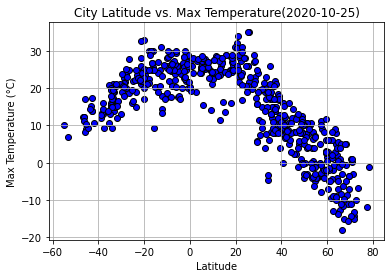

In [74]:
#Build Latitude vs Max temperature Plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title(f"City Latitude vs. Max Temperature({city_df['Date'][0]})")
plt.savefig("Output_plots/lat_maxTemp_plot")
plt.show()

#### Conclusion: 
* It seems that the closer you are to latitude 0 (equator), at this time of year, the temperature behaves as follows: for most of the countries of the northern hemisphere it exceeds 10 ° C and increases the closer It is from the equator. On the other hand, for the countries of the southern hemisphere, it decreases the further they are from the equator, reaching temperatures below 0 °


#### Latitude vs. Humidity Plot

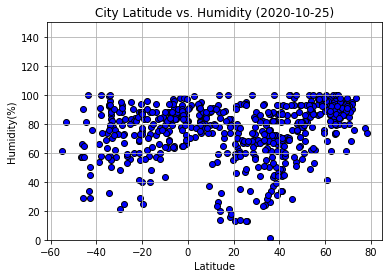

In [79]:
#Build Latitude vs Humidity Plot
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({city_df['Date'][0]})")
plt.savefig("Output_plots/lat_humidity_plot")
plt.show()

#### Conclusion:

* Humidity has a behavior pattern that can be seen in several groups, for example, for latitudes close to the equator it is concentrated in high percentages, as well as for latitudes further from the equator in the hemisphere, but not for latitudes far from the equator in the northern hemisphere where it varies considerably.

#### Latitude vs. Cloudiness Plot

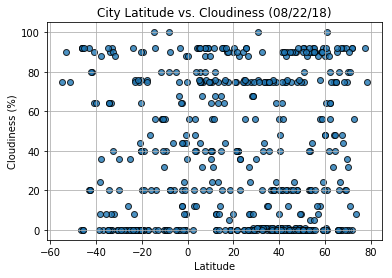

In [8]:
#Build Latitude vs Humidity Plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("Lat_vs_cloudiness_plot")
plt.show()

#### Latitude vs. Wind Speed Plot

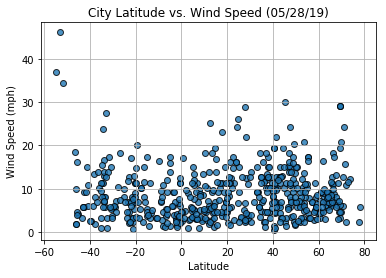

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


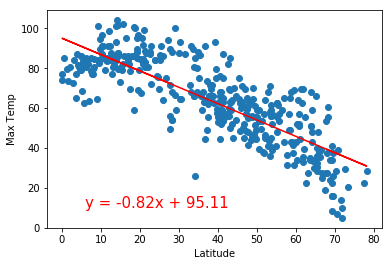

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


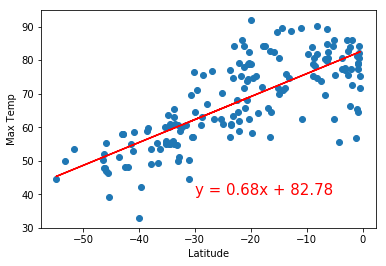

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


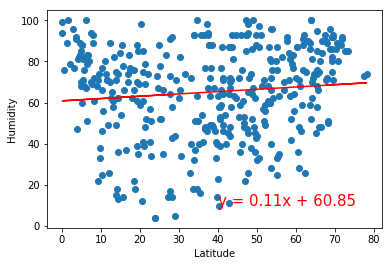

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


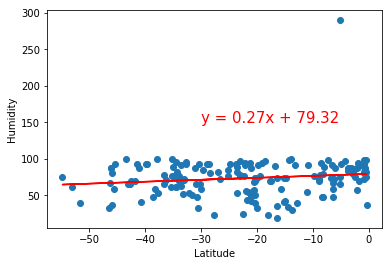

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


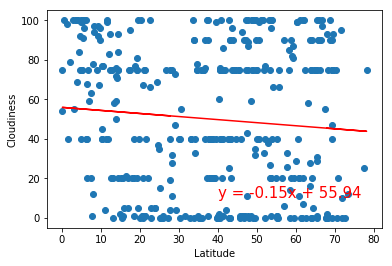

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


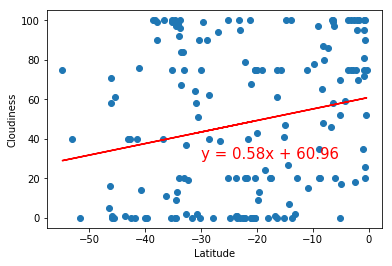

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


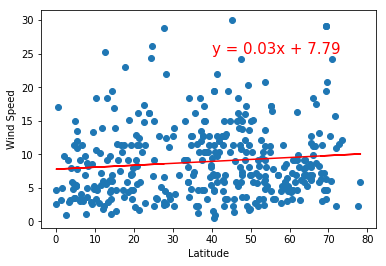

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


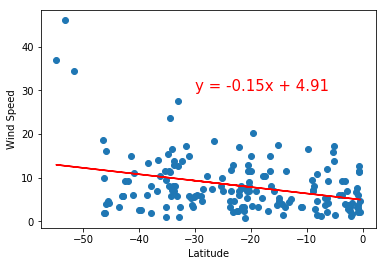